In [11]:
from PIL import Image as PI
from wand.image import Image
import pyocr
import pyocr.builders
import io


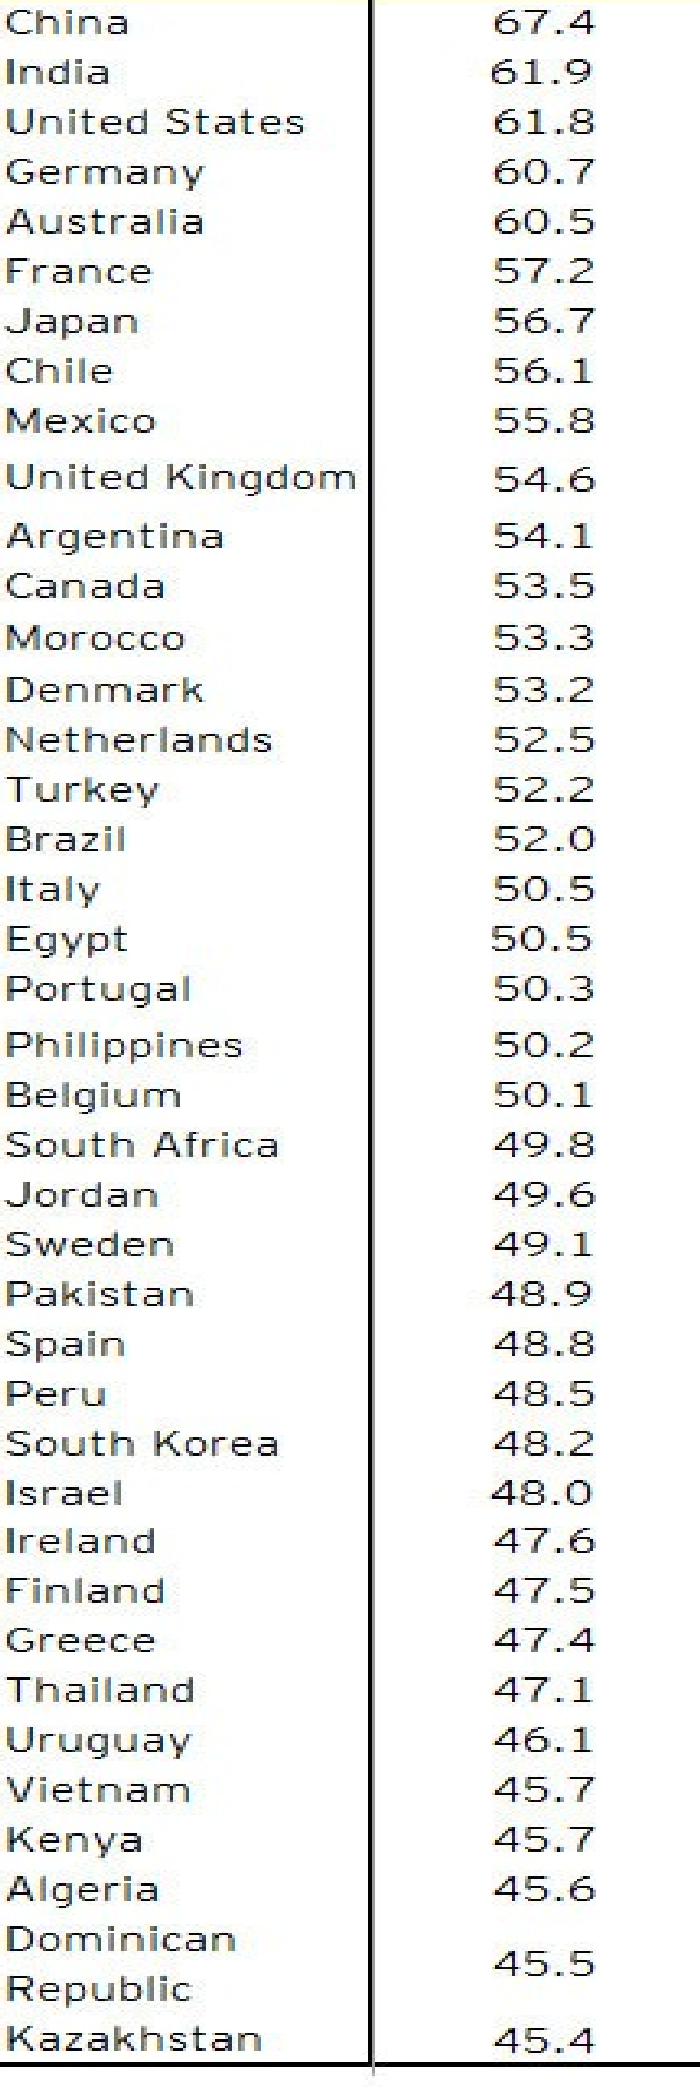

In [148]:
nim = PI.open('ey-recai-50-october-2017-scores.jpg')
nim1 = nim.crop((185, 110, 400, 1038))
# nim1 = nim.crop((300, 110, 400, 200))

nim1 = nim1.resize((700,2100))

nim1.save('recai_resized.jpg')
nim1

In [17]:
tool = pyocr.get_available_tools()[0]
tool
lang = tool.get_available_languages()[0]
lang



'eng'

In [150]:
im = Image(filename='recai_resized.jpg')
req_image = []
final_text = []

for img in im.sequence:
    img_page = Image(image=img)
    req_image.append(img_page.make_blob('jpeg'))

for img in req_image:
    txt = tool.image_to_string(
        PI.open(io.BytesIO(img)),
        lang=lang,
        builder=pyocr.builders.TextBuilder()
    )
    final_text.append(txt)

print(final_text[0])

China

India

United States
Germany
Australia
France

Japan

Chile

Mexico

United Kingdom

Argentina
Canada
Morocco
Denmark
Netherlands
Turkey
Brazil

Italy

Egypt
Portugal
Philippines
Belgium
South ﬂfrica
Jordan
Sweden
Pakistan
Spain

Peru

South Korea
Israel
Ireland
Finland
Greece
ThaHand
Uruguayr
Vietnam
Kenya
Algeria
Dominican
Republic
Kazakhstan

 

67.4
61.9
61.8
60.7
60.5
57.2
56.7
55.1
55.8

54.6

54.1
53.5
53.3
53.2
52.5
52.2
52.0
50.5
50.5
50.3
50.2
50.1
49.8
49.6
49.1
48.9
48.8
48.5
48.2
48.0
47.6
47.5
47.4
47.1
45.1
45.7
45.7
45.6

45.5

45.4


In [153]:
with open("recai_ocr.txt", "a") as text_file:
    text_file.write( final_text[0] )